In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
import anndata as ad
import scanpy as sc
import squidpy as sq
import scvi

In [2]:
in_dir = "../../results/10_stereo_seq/03_integrate_data"
out_dir = "../../results/10_stereo_seq/04_clustering"

os.makedirs(out_dir, exist_ok=True)

In [3]:
adata = sc.read_h5ad(f"{in_dir}/adata.h5ad")

In [15]:
adata = adata.raw.to_adata()

In [16]:
adata

AnnData object with n_obs × n_vars = 37603 × 23475
    obs: 'sample', 'condition', 'x', 'y', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden'
    var: 'gene_id', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'mt', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'condition_colors', 'hvg', 'log1p', 'neighbors', 'pca', 'sample_colors', 'umap', 'leiden', 'leiden_colors'
    obsm: 'X_pca', 'X_pca_harmony', 'X_scVI', 'X_umap', '_scvi_extra_continuous_covs', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [18]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

In [8]:
sc.tl.leiden(adata, key_added="leiden", resolution=1)

IOStream.flush timed out


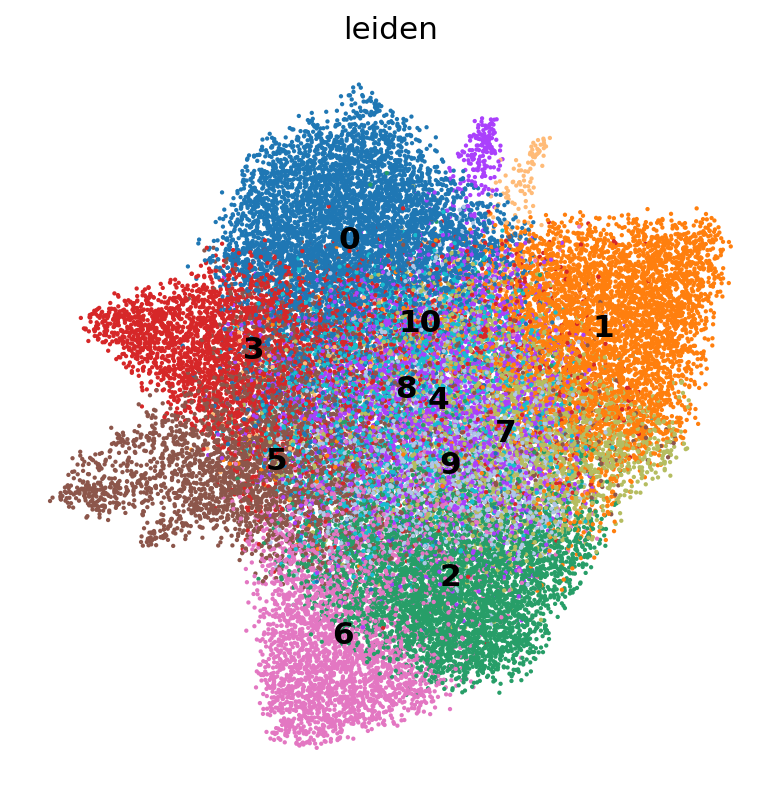

In [9]:
sc.set_figure_params(figsize=(6, 6))

sc.pl.umap(adata, color=['leiden'], frameon=False, size=15, legend_loc='on data')

In [25]:
marker_genes = {
    'B cells': ['CD79A'],
    'Endothelial cells': ['VWF', 'PECAM1'],
    'Fibroblast cells': ['DCN','COL1A1'],
    'Keratinocytes cells': ['KRT1','KRT5'],
    'Langerhans cells': ['CD1A'],
    'Macrophages': ['CD68','CD163'],
    # 'Mast cells': ['TPSAB1'],
    'Melanocytes': ['PMEL'],
    'Monocytes': ['FCN1'],
    # 'NK cells': ['NKG7'],
    'Neural': ['PLP1'],
    'Pericytes': ['RGS5'],
    'Plasma cells': ['SDC1'],
    'Secretory cells': ['SCGB2A2','MUCL1', 'CALML5'],
    'Smooth Muscle': ['TAGLN'],
    'T cells': ['CD2'],
    'cDC': ['CD1C'],
    'pDC': ['IRF8'],
}

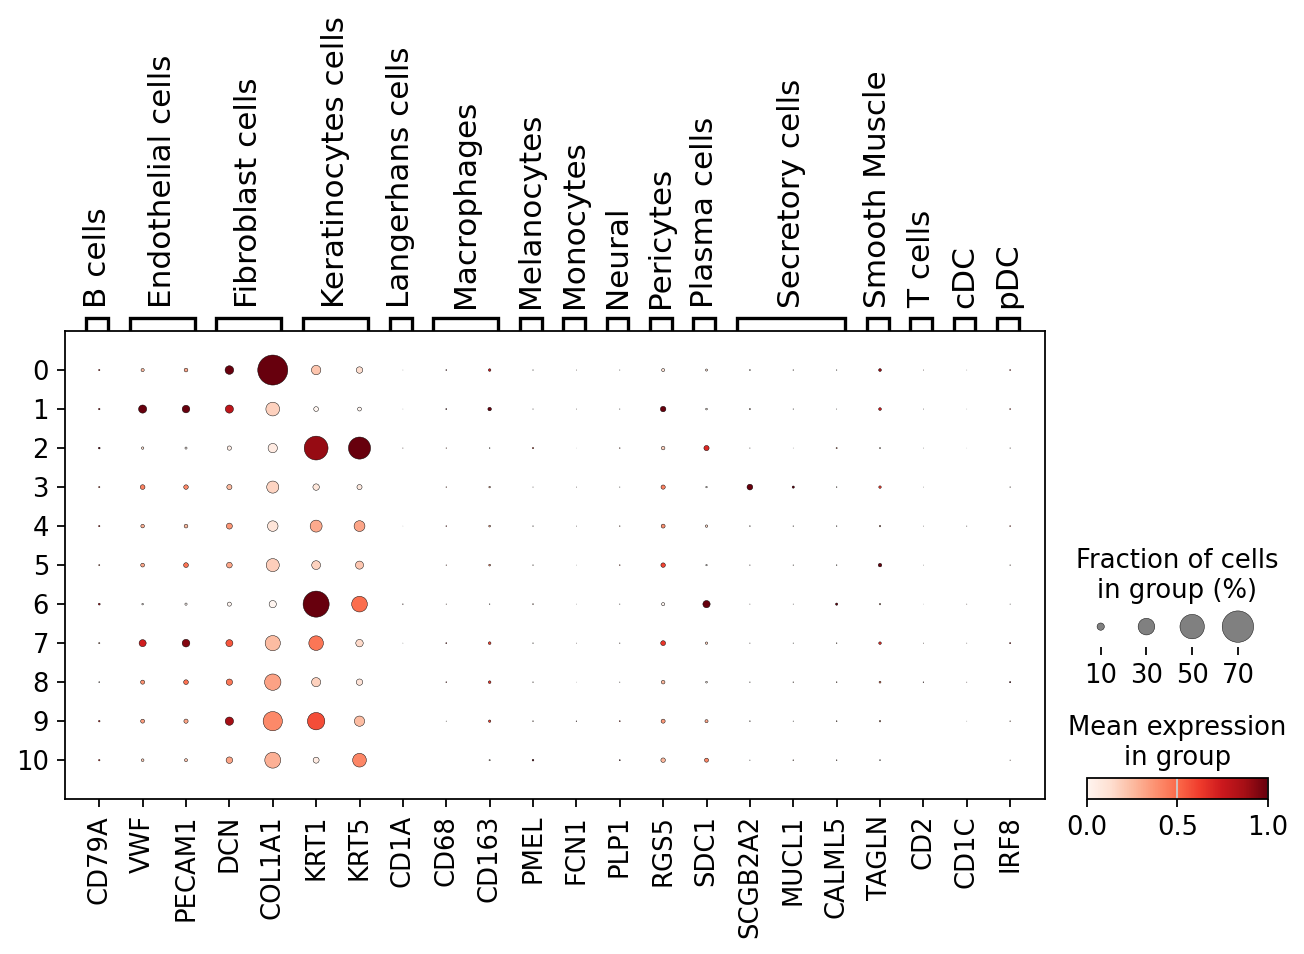

In [26]:
sc.set_figure_params(figsize=(8, 10))

sc.pl.dotplot(adata, marker_genes, 
              groupby='leiden', 
              standard_scale='var',
              dendrogram=False)